<a href="https://colab.research.google.com/github/norgaston/laboratorio1-bdml/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
import numpy as np
from itertools import combinations
from collections import Counter

!pip install -U kaleido

dir = Path("/content/drive/MyDrive/Colab Notebooks/dataset_ventas") # directorio donde están los datasets (cambiar si hace falta)
# Leo los csv del directorio y los concateno en un dataframe
df = (pd.read_csv(f) for f in dir.glob("*.csv"))
df = pd.concat(df)
# Filtro el título
titulo = df.iloc[0]
# Filtra el DataFrame para eliminar las filas que coinciden con el título
df = df[df.apply(lambda row: not row.equals(titulo), axis=1)]
# Elimino los valores nulos del dataframe
df = df.dropna()
# Elimino las filas donde el ID no sea un número
df = df[df['ID de Pedido'].apply(lambda x: str(x).isdigit())]
# Restablece los índices si es necesario
df.reset_index(drop=True, inplace=True)
# Redondear 'Precio Unitario' a 2 decimales y convertirlo a float
df['Precio Unitario'] = df['Precio Unitario'].astype(float)
# Convertir 'Cantidad Pedida' a int
df['Cantidad Pedida'] = df['Cantidad Pedida'].astype(int)
df.drop_duplicates()
#df['Columna'].sum()
print("Precio promedio de los productos:", df['Precio Unitario'].mean())
print("Desviación estándar en el precio:", df['Precio Unitario'].std())
print("Precio más bajo:", df['Precio Unitario'].min())
print("Precio más alto:", df['Precio Unitario'].max())
print("Cantidad promedio pedida:", df['Cantidad Pedida'].mean())
#df['Columna'].median()
print("Cantidad mínima:", df['Cantidad Pedida'].min())
print("Cantidad máxima:", df['Cantidad Pedida'].max())

df['Precio Unitario'].unique()
df['Producto'].unique()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
Precio promedio de los productos: 184.40066217081022
Desviación estándar en el precio: 332.7319842405589
Precio más bajo: 2.99
Precio más alto: 1700.0
Cantidad promedio pedida: 1.1243781897186864
Cantidad mínima: 1
Cantidad máxima: 9


array(['Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones',
       'USB-C Charging Cable', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [ ]:
# Identificar registros duplicados basados en el número de pedido (Order ID)
duplicados = df[df.duplicated(subset='ID de Pedido', keep=False)]
# Agrupar los registros duplicados por número de pedido y obtener una lista de productos
agrupados = duplicados.groupby('ID de Pedido')['Producto'].apply(list)
# Contar las combinaciones de productos que aparecen juntas
combinaciones = []
for productos in agrupados:
    combinaciones.extend(combinations(productos, 2))
conteo_combinaciones = Counter(combinaciones)
# Filtrar las combinaciones con cantidad mayor o igual a 50
combinaciones_mas_comunes = [(comb, count) for comb, count in conteo_combinaciones.items() if count >= 50]
print(combinaciones_mas_comunes)
if combinaciones_mas_comunes:
    # Ordenar las combinaciones de mayor a menor cantidad
    combinaciones_mas_comunes.sort(key=lambda x: x[1], reverse=True)
    # Preparar los datos para el gráfico
    combinaciones_labels = [', '.join(comb) for comb, count in combinaciones_mas_comunes]
    combinaciones_cantidad = [count for comb, count in combinaciones_mas_comunes]

    # Crear el gráfico de barras apiladas con Plotly Graph Objects
    fig = go.Figure()

    for label, cantidad in zip(combinaciones_labels, combinaciones_cantidad):
        fig.add_trace(go.Bar(
            x=[cantidad],
            y=[label],
            orientation='h',
            name=label,
            text=cantidad,  # Etiqueta de datos
            textposition='outside',  # Colocar la etiqueta fuera de la barra
            showlegend=False  # Ocultar la leyenda
        ))

    # Personalizar el diseño del gráfico
    fig.update_layout(
        title='Combinaciones de Productos Más Comunes (Cantidad >= 50)',
        xaxis_title='Cantidad',
        yaxis_title='Combinación de Productos',
        barmode='stack',  # Apilar las barras
    )

    # Guardar el gráfico en formato PNG
    pio.write_image(fig, 'combinación_de_productos.png')

    # Mostrar el gráfico
    fig.show()
else:
    print("No se encontraron combinaciones de productos con cantidad mayor o igual a 50.")

[(('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Google Phone', 'USB-C Charging Cable'), 987), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('iPhone', 'Apple Airpods Headphones'), 360), (('iPhone', 'Wired Headphones'), 447), (('Apple Airpods Headphones', 'Wired Headphones'), 69), (('Lightning Charging Cable', 'Wired Headphones'), 92), (('iPhone', 'Lightning Charging Cable'), 1005), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('Google Phone', 'Wired Headphones'), 414), (('Bose SoundSport Headphones', 'Wired Headphones'), 53), (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80), (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81), (('AAA Batteries (4-pack)', 'USB-C Charging Cable'), 50), (('Lightning Charging Cable', 'USB-C Charging Cable'), 58), (('AA Batteries (4-pack)', 'Lightning Charging Cable'), 51), (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77), (('Lightning Charging Cable', '

<ipython-input-4-57745710d1b4>:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



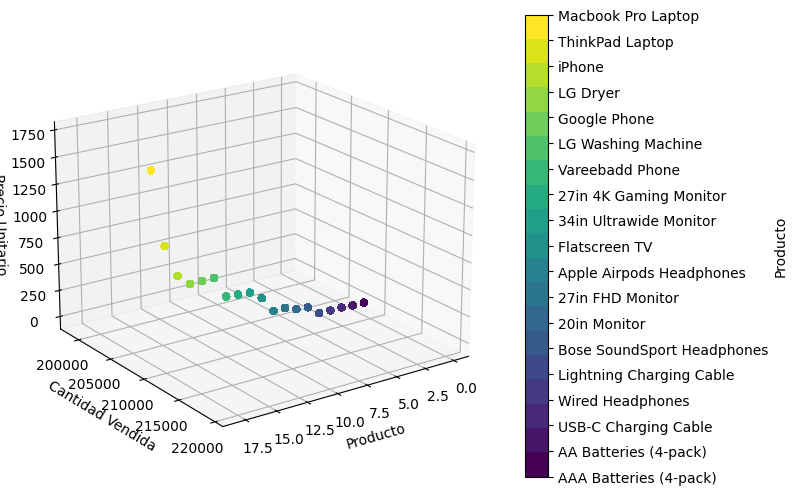

In [ ]:
# Ordenar el DataFrame por la columna 'Precio Unitario' de forma ascendente
df = df.sort_values(by='Precio Unitario', ascending=True)

# Crear un diccionario que mapee productos a IDs únicos
productos_unicos = df['Producto'].unique()
producto_id_dict = {producto: i for i, producto in enumerate(productos_unicos)}

# Agregar una nueva columna 'Producto_ID' al DataFrame
df['Producto_ID'] = df['Producto'].map(producto_id_dict)

# Crear una figura 3D con un tamaño más grande
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear una paleta de colores única basada en la cantidad de productos
n_productos = len(df['Producto_ID'].unique())
colormap = get_cmap('viridis', n_productos)

# Crear el gráfico 3D con colores
scatter = ax.scatter(df['Producto_ID'], df['Cantidad Pedida'].sum(), df['Precio Unitario'], c=df['Producto_ID'], cmap=colormap)

# Configurar etiquetas de los ejes
ax.set_xlabel('Producto')
ax.set_ylabel('Cantidad Vendida')
ax.set_zlabel('Precio Unitario')

# Rotar el gráfico para una mejor visualización
ax.view_init(elev=20, azim=55)

# Configurar una barra de colores para identificar los productos con etiquetas personalizadas
cbar = fig.colorbar(scatter, ax=ax, ticks=range(n_productos))
cbar.set_label('Producto')
cbar.set_ticklabels(productos_unicos)
# Guardar el gráfico en formato PNG
plt.savefig('cantidad_vendida_vs_precio_unitario.png')
# Mostrar el gráfico
plt.show()

In [ ]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Dividir la columna 'Dirección de Envío' en partes (Calle, Ciudad, Estado y Código Postal)
df[['Calle', 'Ciudad', 'Estado CP']] = df['Dirección de Envio'].str.split(', ', n=2, expand=True)
# Dividir la columna 'Estado CP' en 'Estado' y 'Código Postal'
df[['Estado', 'Código Postal']] = df['Estado CP'].str.split(' ', n=1, expand=True)
# Eliminar las columnas temporales 'Estado CP' y 'Dirección de Envío' si ya no las necesitas
df.drop(columns=['Estado CP', 'Dirección de Envio'], inplace=True)
df['Fecha de Pedido'] = pd.to_datetime(df['Fecha de Pedido'])
mes = df['Fecha de Pedido'].dt.month
df['Cantidad Pedida'] = df['Cantidad Pedida'].astype(int)
df['Precio Unitario'] = df['Precio Unitario'].astype(float)
df['Monto Total'] = df['Cantidad Pedida'] * df['Precio Unitario']
# Agrupa los datos por mes y calcula la suma del monto total en cada mes
ventas_por_mes = df.groupby(df['Fecha de Pedido'].dt.month)['Monto Total'].sum().reset_index()
# Ordena el DataFrame por la columna de fecha
df = df.sort_values(by='Fecha de Pedido')
# Restablece los índices si es necesario
df.reset_index(drop=True, inplace=True)
# La variable 'ventas_por_mes' contiene la suma de las ventas totales en cada mes
print("Mes con más ventas totales:", meses[ventas_por_mes['Monto Total'].idxmax()])
venta_mas_cara = df['Monto Total'].idxmax()
print("Venta más cara en todo el año:\n", df.iloc[venta_mas_cara])
# Agrupa los datos por día y calcula las ventas totales para cada día
df['Ventas Totales'] = df.groupby(df['Fecha de Pedido'].dt.date)['Monto Total'].transform('sum')
# Encuentra el día con las ventas totales más altas
dia_con_mas_ventas = df[df['Ventas Totales'] == df['Ventas Totales'].max()]['Fecha de Pedido'].iloc[0].date()
dia_con_menos_ventas = df[df['Ventas Totales'] == df['Ventas Totales'].min()]['Fecha de Pedido'].iloc[0].date()
# Imprime el resultado
print(f"Día con más ventas totales: {dia_con_mas_ventas}")
print(f"Día con menos ventas totales: {dia_con_menos_ventas}")
# Agrupa por mes y producto, y calcula la cantidad total vendida en cada mes
ventas_por_mes_y_producto = df
ventas_por_mes_y_producto['Mes'] = df['Fecha de Pedido'].dt.month
ventas_por_mes_y_producto = df.groupby(['Mes', 'Producto'])['Cantidad Pedida'].sum().reset_index()
# Encuentra el índice del producto más vendido por mes
idx_max_por_mes = ventas_por_mes_y_producto.groupby('Mes')['Cantidad Pedida'].idxmax()
# Obtiene el producto más vendido por mes
productos_mas_vendidos_por_mes = ventas_por_mes_y_producto.loc[idx_max_por_mes]
# Agrupa nuevamente por producto y suma la cantidad vendida para obtener la cantidad total
ventas_producto_mas_vendido = productos_mas_vendidos_por_mes.groupby('Producto')['Cantidad Pedida'].sum().reset_index()
# Muestra el producto más vendido y la cantidad total vendida por mes
print("Producto más vendido por mes:")
print(productos_mas_vendidos_por_mes)

# Muestra la cantidad total vendida del producto más vendido
print("Cantidad total vendida del producto más vendido:")
print(ventas_producto_mas_vendido)

# Filtrar el DataFrame para obtener solo el producto más vendido
producto_mas_vendido = ventas_producto_mas_vendido['Producto'].values[0]
df_producto_mas_vendido = ventas_por_mes_y_producto[ventas_por_mes_y_producto['Producto'] == producto_mas_vendido]

# Crear la figura de línea con Plotly Graph Objects
fig = go.Figure()

# Agregar una línea para la cantidad vendida del producto más vendido
fig.add_trace(go.Scatter(
    x=meses,
    y=df_producto_mas_vendido['Cantidad Pedida'],
    mode='lines+markers',
    name=producto_mas_vendido,
    marker=dict(color='blue'),  # Puedes personalizar el color de la línea
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title=f'Cantidad Vendida del Producto Más Vendido por Mes: {producto_mas_vendido}',
    xaxis_title='Mes',
    yaxis_title='Cantidad Vendida',
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'producto más vendido y cantidad.png')
# Mostrar el gráfico
fig.show()

Mes con más ventas totales: Diciembre
Venta más cara en todo el año:
 ID de Pedido                    181544
Producto            Macbook Pro Laptop
Cantidad Pedida                      2
Precio Unitario                 1700.0
Fecha de Pedido    2019-04-22 12:48:00
Producto_ID                         18
Calle                      731 11th St
Ciudad                   New York City
Estado                              NY
Código Postal                    10001
Monto Total                     3400.0
Name: 49916, dtype: object
Día con más ventas totales: 2019-12-04
Día con menos ventas totales: 2020-01-01
Producto más vendido por mes:
     Mes                Producto  Cantidad Pedida
5      1  AAA Batteries (4-pack)             1600
24     2  AAA Batteries (4-pack)             1972
43     3  AAA Batteries (4-pack)             2479
62     4  AAA Batteries (4-pack)             2939
81     5  AAA Batteries (4-pack)             2927
100    6  AAA Batteries (4-pack)             2162
119    7  AAA 

In [ ]:
# Crear el objeto figura
fig = go.Figure()

# Agregar un gráfico de barras al objeto figura
fig.add_trace(go.Bar(
    x=meses,
    y=ventas_por_mes['Monto Total'],
    text=ventas_por_mes['Monto Total'],
    marker=dict(
        color=ventas_por_mes['Monto Total'],
        colorscale='RdYlGn',
        colorbar=dict(title="Total de ventas")
    ),
    name='Ventas Totales'
))

# Configurar títulos y ejes del gráfico
fig.update_layout(
    title=dict(
        text='Ventas Totales por Mes',
        x=0.5  # Centrar el título
    ),
    xaxis_title='Meses',
    yaxis_title='Ventas Totales'
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_totales_por_mes.png')
# Mostrar el gráfico
fig.show()

In [ ]:
ventas_por_hora = df.groupby(df['Fecha de Pedido'].dt.hour)['Cantidad Pedida'].sum()
print("Cantidad de ventas totales a una hora:\n", ventas_por_hora)
hora_max_ventas = ventas_por_hora.idxmax()
print("Hora donde más se vende:", hora_max_ventas)

Cantidad de ventas totales a una hora:
 Fecha de Pedido
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7000
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Cantidad Pedida, dtype: int64
Hora donde más se vende: 19


In [ ]:
import plotly.graph_objects as go

horas = list(range(25))

# Crear el objeto figura
fig = go.Figure()

# Agregar un gráfico de barras al objeto figura
fig.add_trace(go.Bar(
    x=horas,  # Horas en el eje X
    y=ventas_por_hora.values,  # Cantidad Pedida en el eje Y
    text=ventas_por_hora.values,
    marker=dict(
        color=ventas_por_hora.values,
        colorscale='RdYlGn',
        colorbar=dict(title="Total de ventas")
    ),
    name='Ventas por Hora'
))

# Configurar títulos y ejes del gráfico
fig.update_layout(
        title=dict(
        text='Cantidad de Ventas por Hora',
        x=0.5  # Centrar el título
    ),
    #title='Cantidad de Ventas por Hora',
    xaxis_title='Hora del día',
    yaxis_title='Ventas Totales',
    xaxis=dict(
        tickmode='linear',  # Modo de marcado lineal
        tick0=0,  # Valor inicial
        dtick=1  # Intervalo de marcado (en este caso, 1 hora)
    )
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_por_hora.png')
# Mostrar el gráfico
fig.show()

In [ ]:
# Agrupar por ciudad y calcular las ventas totales
ventas_por_ciudad = df.groupby('Ciudad')['Monto Total'].sum()

# Ordenar las ciudades en orden descendente según las ventas totales
ciudades_en_orden_descendente = ventas_por_ciudad.sort_values(ascending=False).index.tolist()

# Imprimir la lista de ciudades en orden descendente
print("Ciudades en orden descendente de ventas totales:")
print(ciudades_en_orden_descendente)

# Agrupar por estado y calcular las ventas totales
ventas_por_estado = df.groupby('Estado')['Monto Total'].sum()

# Ordenar las ciudades en orden descendente según las ventas totales
estados_en_orden_descendente = ventas_por_estado.sort_values(ascending=False).index.tolist()

# Imprimir la lista de ciudades en orden descendente
print("Estados en orden descendente de ventas totales:")

def obtener_nombres_estados(codigos_estados):
    estados = {
        'CA': 'California',
        'NY': 'New York',
        'TX': 'Texas',
        'MA': 'Massachusetts',
        'GA': 'Georgia',
        'WA': 'Washington',
        'OR': 'Oregon',
        'ME': 'Maine'
        # Agrega más estados según sea necesario
    }

    # Utilizar comprensión de lista para obtener nombres de estado para cada código
    nombres_estados = [estados.get(codigo, 'Estado Desconocido') for codigo in codigos_estados]

    return nombres_estados

print(obtener_nombres_estados(estados_en_orden_descendente))

Ciudades en orden descendente de ventas totales:
['San Francisco', 'Los Angeles', 'New York City', 'Boston', 'Atlanta', 'Dallas', 'Seattle', 'Portland', 'Austin']
Estados en orden descendente de ventas totales:
['California', 'New York', 'Texas', 'Massachusetts', 'Georgia', 'Washington', 'Oregon', 'Maine']


In [ ]:
ventas_por_ciudad = df.groupby('Ciudad')['Monto Total'].sum()
# Convertir la serie de ventas por ciudad en un nuevo DataFrame
ventas_ciudad_df = pd.DataFrame({'Ciudad': ventas_por_ciudad.index, 'Ventas Totales': ventas_por_ciudad.values})
# Ordenar por cantidad de ventas
ventas_ciudad_df = ventas_ciudad_df.sort_values(by='Ventas Totales', ascending=False)
# Mostrar las ventas totales por ciudad
print(ventas_ciudad_df)
# Graficar las ventas totales por ciudad
fig_ciudad = go.Figure(data=[go.Bar(x=ventas_ciudad_df['Ciudad'], y=ventas_ciudad_df['Ventas Totales'])])
fig_ciudad.update_layout(title='Ventas Totales por Ciudad', xaxis_title='Ciudad', yaxis_title='Ventas Totales')
# Guardar el gráfico en formato PNG
pio.write_image(fig_ciudad, 'ventas_por_ciudad.png')
fig_ciudad.show()

          Ciudad  Ventas Totales
7  San Francisco      8262203.91
4    Los Angeles      5452570.80
5  New York City      4664317.43
2         Boston      3661642.01
0        Atlanta      2795498.58
3         Dallas      2767951.50
8        Seattle      2747755.48
6       Portland      2320490.61
1         Austin      1819581.75


In [16]:
# Agrupar por estado y calcular las ventas totales
ventas_por_estado = df.groupby('Estado')['Monto Total'].sum()
# Convertir la serie de ventas por estado en un nuevo DataFrame
ventas_estado_df = pd.DataFrame({'Estado': ventas_por_estado.index, 'Ventas Totales': ventas_por_estado.values})
# Ordenar por cantidad de ventas
ventas_estado_df = ventas_estado_df.sort_values(by='Ventas Totales', ascending=False)
# Mostrar las ventas totales por estado
print(ventas_estado_df)

# Graficar las ventas totales por estado
fig_estado = go.Figure(data=[go.Bar(x=obtener_nombres_estados(ventas_estado_df['Estado']), y=ventas_estado_df['Ventas Totales'])])
fig_estado.update_layout(title='Ventas Totales por Estado', xaxis_title='Estado', yaxis_title='Ventas Totales')
# Guardar el gráfico en formato PNG
pio.write_image(fig_estado, 'ventas_por_estado.png')
fig_estado.show()

# Crear el gráfico de torta
fig = go.Figure(data=[go.Pie(labels=obtener_nombres_estados(ventas_estado_df['Estado']), values=ventas_estado_df['Ventas Totales'])])
# Personalizar el diseño del gráfico
fig.update_layout(
    title='Porcentaje de Ventas Totales por Estado',
    title_x=0.5,  # Centrar el título
    font=dict(size=14),  # Tamaño de la fuente
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_por_estado_pie.png')
# Mostrar el gráfico
fig.show()

  Estado  Ventas Totales
0     CA     13714774.71
4     NY      4664317.43
6     TX      4587533.25
2     MA      3661642.01
1     GA      2795498.58
7     WA      2747755.48
5     OR      1870732.34
3     ME       449758.27


In [ ]:
# Extraer el día de la semana (lunes, martes, miércoles, etc.) de la fecha de pedido
df['Día de la Semana'] = df['Fecha de Pedido'].dt.day_name()
# Crear un diccionario para mapear los nombres de los días en inglés a español
dias_en_ingles =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_en_espanol = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
mapeo_dias = dict(zip(dias_en_ingles, dias_en_espanol))
# Reemplazar los nombres de los días en inglés por los nombres en español
df['Día de la Semana'] = df['Día de la Semana'].map(mapeo_dias)
# Agrupar por día de la semana y calcular las ventas totales para cada día
ventas_por_dia_semana = df.groupby('Día de la Semana')['Monto Total'].sum()
ventas_por_dia_semana = ventas_por_dia_semana[dias_en_espanol]

# Crear un gráfico de barras con Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ventas_por_dia_semana.index,
    y=ventas_por_dia_semana.values,
    #marker=dict(color='blue'),  # Color de las barras
))
fig.update_layout(
    title='Variación de Ventas a lo largo de la Semana',
    xaxis_title='Día de la Semana',
    yaxis_title='Ventas Totales',
    xaxis=dict(tickangle=45),  # Rotar etiquetas del eje x para una mejor visualización
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_en_la_semana.png')
fig.show()
print(ventas_por_dia_semana.describe())
print(ventas_por_dia_semana)

count    7.000000e+00
mean     4.927430e+06
std      8.649669e+04
min      4.839465e+06
25%      4.869621e+06
50%      4.904357e+06
75%      4.960496e+06
max      5.087957e+06
Name: Monto Total, dtype: float64
Día de la Semana
Lunes        4883326.72
Martes       5087956.78
Miércoles    4988822.26
Jueves       4839465.16
Viernes      4855914.48
Sábado       4904357.01
Domingo      4932169.66
Name: Monto Total, dtype: float64


In [ ]:
# Calcular el promedio de ventas por mes
#df['Fecha de Pedido'] = pd.to_datetime(df['Fecha de Pedido'])  # Asegurarse de que la columna sea de tipo datetime
df['Mes'] = df['Fecha de Pedido'].dt.month  # Extraer el mes de la fecha
promedio_ventas_por_mes = df.groupby('Mes')['Monto Total'].mean()

# Lista de fechas de días festivos (puedes personalizar esto según tus datos)
dias_festivos = [
    '2019-01-01',  # Año Nuevo
    '2019-07-04',  # Día de la Independencia
    '2019-12-25',  # Navidad
    '2019-11-28',  # Día de Acción de Gracias
    '2019-05-27',  # Día de los Caídos
    '2019-09-02',  # Día del Trabajo
    '2019-02-14',  # Día de San Valentín
    '2019-10-31',  # Halloween
    '2019-04-21',  # Domingo de Pascua
]

# Calcular las ventas totales para cada período alrededor de los días festivos
ventas_alrededor_de_festivos = []

for festivo in dias_festivos:
    fecha_festivo = pd.to_datetime(festivo)
    inicio_periodo = fecha_festivo - pd.DateOffset(days=3)
    fin_periodo = fecha_festivo + pd.DateOffset(days=3)

    ventas_periodo = df[(df['Fecha de Pedido'] >= inicio_periodo) & (df['Fecha de Pedido'] <= fin_periodo)]['Monto Total'].mean()
    ventas_alrededor_de_festivos.append((festivo, ventas_periodo))

# Convertir el promedio de ventas por mes en un DataFrame
df_promedio_ventas_mes = pd.DataFrame({'Mes': promedio_ventas_por_mes.index, 'Promedio Ventas Mensual': promedio_ventas_por_mes.values})

# Convertir el promedio de ventas alrededor de los festivos en un DataFrame
df_ventas_alrededor_festivos = pd.DataFrame(ventas_alrededor_de_festivos, columns=['Fecha del festivo', 'Promedio Ventas Festivo'])

print(df_promedio_ventas_mes)
print(df_ventas_alrededor_festivos)

# Crear una figura
fig = go.Figure()

# Agregar una barra para el promedio de ventas por mes
fig.add_trace(go.Bar(
    x=df_promedio_ventas_mes['Mes'],
    y=df_promedio_ventas_mes['Promedio Ventas Mensual'],
    name='Promedio Ventas Mensual'
))

# Crear una columna 'Mes' en df_ventas_alrededor_festivos para que coincida con el mes de la fecha del festivo
df_ventas_alrededor_festivos['Mes'] = pd.to_datetime(df_ventas_alrededor_festivos['Fecha del festivo']).dt.month

# Agregar una barra para las ventas festivas
fig.add_trace(go.Bar(
    x=df_ventas_alrededor_festivos['Mes'],
    y=df_ventas_alrededor_festivos['Promedio Ventas Festivo'],
    name='Ventas Promedio en Días Festivos'
))

# Configurar el diseño del gráfico combinado
fig.update_layout(
    barmode='group',
    title='Comparación de Ventas Mensuales y en Días Festivos',
    xaxis_title='Mes',
    yaxis_title='Promedio de Ventas',
    xaxis=dict(type='category', tickangle=0),
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_dias_festivos.png')
# Mostrar el gráfico
fig.show()

    Mes  Promedio Ventas Mensual
0     1               187.687376
1     2               183.884962
2     3               185.250471
3     4               185.504231
4     5               190.305852
5     6               190.187565
6     7               185.249826
7     8               187.648849
8     9               180.497387
9    10               184.238580
10   11               182.074956
11   12               184.655913
  Fecha del festivo  Promedio Ventas Festivo
0        2019-01-01               199.068698
1        2019-07-04               190.573168
2        2019-12-25               180.746669
3        2019-11-28               182.649036
4        2019-05-27               191.716103
5        2019-09-02               174.217387
6        2019-02-14               185.698795
7        2019-10-31               189.072596
8        2019-04-21               179.870544


Estos datos muestran patrones de ventas en diferentes meses y alrededor de días festivos específicos. Por ejemplo, parece que las ventas son más altas en mayo y junio, y que el Día de Año Nuevo tiene un promedio de ventas particularmente alto. Esto puede ser útil para tomar decisiones comerciales, como la planificación de promociones o la gestión de inventario durante períodos de ventas más altas.

In [ ]:
dt1 = df.groupby(['Ciudad','Producto'])['Cantidad Pedida'].sum().reset_index().sort_values(by='Cantidad Pedida', ascending=False)
dt1
# Crear el gráfico de barras
fig = go.Figure()

# Agregar las barras al gráfico
for producto in dt1['Producto'].unique():
    df_filtrado = dt1[dt1['Producto'] == producto]
    fig.add_trace(go.Bar(
        x=df_filtrado['Ciudad'],
        y=df_filtrado['Cantidad Pedida'],
        name=producto
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Cantidad Pedida por Ciudad y Producto',
    xaxis_title='Ciudad',
    yaxis_title='Cantidad Pedida'
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'cantidad_pedida_por_ciudad_y_producto.png')
# Mostrar el gráfico
fig.show()

In [ ]:
#Calcular las ventas multiplicando Precio Unitario por Cantidad Pedida
df_copia = df
df_copia['Ventas'] = df_copia['Precio Unitario'] * df_copia['Cantidad Pedida']

# Luego, agrupar por estado y mes y sumar las ventas
ventas_por_estado_mes = df_copia.groupby(['Estado', 'Mes'])['Ventas'].sum().reset_index()

# Aplicar la función obtener_nombre_estado() a la columna 'Estado'
ventas_por_estado_mes['Estado'] = obtener_nombres_estados(ventas_por_estado_mes['Estado'])

# Mostrar el resultado
print(ventas_por_estado_mes)

# Crear una figura de gráfico de barras
fig = go.Figure()

# Agregar barras para cada estado
for estado in ventas_por_estado_mes['Estado'].unique():
    data_estado = ventas_por_estado_mes[ventas_por_estado_mes['Estado'] == estado]
    fig.add_trace(go.Bar(
        x=meses,
        y=data_estado['Ventas'],
        name=estado
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Ventas por Estado a lo largo de los Meses',
    xaxis_title='Mes',
    yaxis_title='Ventas (en miles)',
    barmode='stack'
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_por_estado_en_meses.png')
# Mostrar el gráfico
fig.show()

        Estado  Mes      Ventas
0   California    1   724190.23
1   California    2   889134.00
2   California    3  1123656.33
3   California    4  1362690.21
4   California    5  1276368.70
..         ...  ...         ...
91  Washington    8   189715.09
92  Washington    9   156369.27
93  Washington   10   316856.26
94  Washington   11   252080.13
95  Washington   12   387317.93

[96 rows x 3 columns]
